In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_excel('dataset/clustered_dataset.xlsx')

In [3]:
df.head()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.,1
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,2


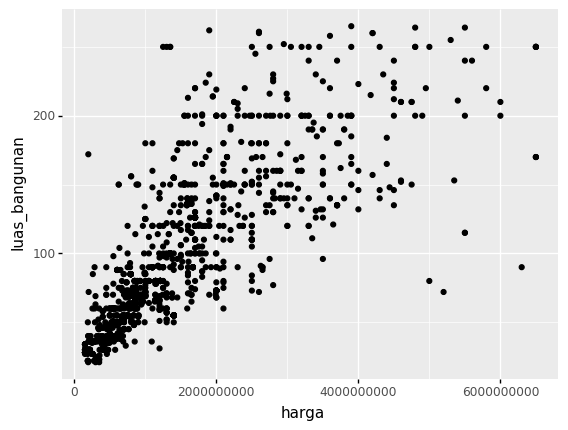

<ggplot: (126786648477)>

In [59]:
df_cleaned = pd.read_excel('dataset/cleaned_dataset.xlsx')
df_sel = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'lantai', 'harga']]
plt1 = ggplot(df_sel, aes(x = 'harga', y = 'luas_bangunan')) + geom_point()
plt1

In [4]:
# ggplot(df, aes(x = 'harga', y = 'luas_bangunan', color = 'Cluster')) + geom_point() + scale_color_manual(values=['#ff0000', '#ff8000', '#ffbf00'])

C:\Users\MSI\mambaforge\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
C:\Users\MSI\mambaforge\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: clustering scatter plot.png


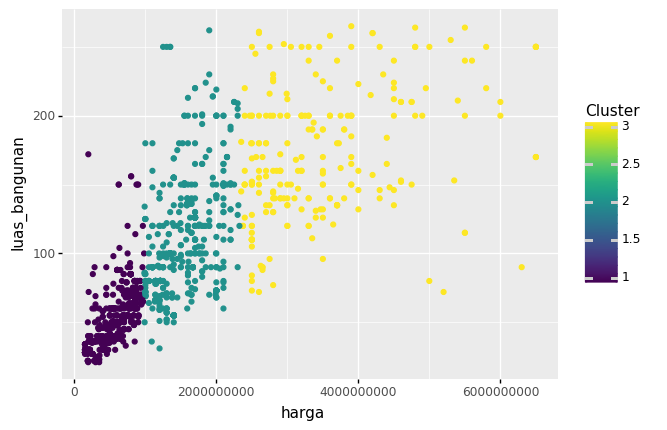

<ggplot: (126785539452)>

In [5]:
from plotnine import ggplot, aes, geom_point, ggsave, scale_color_manual
plt1 = ggplot(df, aes(x = 'harga', y = 'luas_bangunan', color = 'Cluster')) + geom_point()
ggsave(filename="clustering scatter plot.png",
       plot=plt1,
       device='png',
       dpi=300,
       height=5,
       width=7)
plt1

In [6]:
df.describe()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga,Cluster
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1548.000000
mean,83.054910,90.410853,2.918605,2.113695,1.765504,1.344577e+09,1.644057
std,35.979366,54.705834,1.002822,0.969473,0.599438,1.125629e+09,0.729326
min,21.000000,21.000000,1.000000,1.000000,1.000000,1.500000e+08,1.000000
25%,60.000000,50.000000,2.000000,1.000000,1.000000,5.500000e+08,1.000000
50%,78.000000,72.000000,3.000000,2.000000,2.000000,9.360000e+08,1.000000
75%,98.000000,125.000000,3.000000,3.000000,2.000000,1.700000e+09,2.000000
max,203.000000,265.000000,10.000000,9.000000,5.000000,6.500000e+09,3.000000


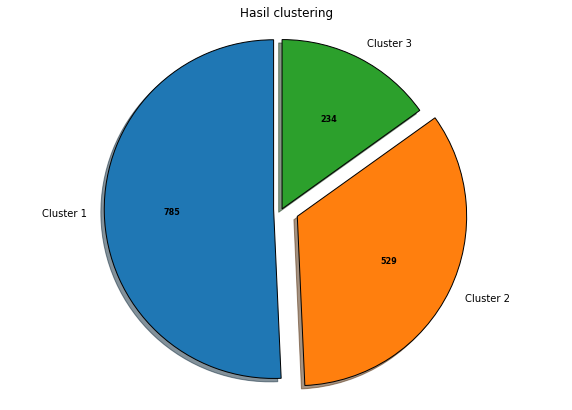

In [7]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']

jml_c1 = int(len(df.loc[df['Cluster'] == 1]))
jml_c2 = int(len(df.loc[df['Cluster'] == 2]))
jml_c3 = int(len(df.loc[df['Cluster'] == 3]))

data = np.array([jml_c1, jml_c2, jml_c3])

colors = ['yellowgreen', 'gold', 'lightskyblue']

explode = (0.05, 0.1, 0.0)

def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return int(a)

wp = { 'linewidth' : 1, 'edgecolor' : "black" }
fig, ax = plt.subplots(figsize =(10, 7))

wedges, texts, autotexts = ax.pie(data,
                                  autopct = absolute_value,
                                  explode = explode,
                                  labels = clusters,
                                  shadow = True,
                                  colors = plt.viridis(),
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
fig.set_facecolor('white')

# ax.legend(wedges, clusters,
#           title ="Clusters",
#           loc ="center left",
#           bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Hasil clustering")


plt.axis('equal')
plt.show()
fig.savefig('Sebaran data setelah proses clustering.jpg', bbox_inches='tight')

<p>Setelah dilakukan clustering, cluster 1 memiliki anggota terbanyak yaitu sebanyak 774 anggota, diikuti oleh cluster 2 yang memiliki sebanyak 533 anggota, dan yang terakhir cluster 3 yang memiliki sebanyak 241 anggota.<p>

In [8]:
cluster1 = df.loc[df['Cluster'] == 1]
# cluster1.reset_index(inplace = True)
cluster1.head()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.,1
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,1
7,98,38,2,1,1,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",650258500,Kemayoran,Jakarta Pusat,Jakarta D.K.I.,1


In [9]:
cluster2 = df.loc[df['Cluster'] == 2]
# cluster2.reset_index(inplace = True)
cluster2.head()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,2
9,77,60,2,1,1,"Koja, Jakarta Utara, Jakarta D.K.I.",1300000000,Koja,Jakarta Utara,Jakarta D.K.I.,2
11,99,140,4,3,2,"Tanjung Priok, Jakarta Utara, Jakarta D.K.I.",2100000000,Tanjung Priok,Jakarta Utara,Jakarta D.K.I.,2
12,77,60,2,1,1,"Koja, Jakarta Utara, Jakarta D.K.I.",1300000000,Koja,Jakarta Utara,Jakarta D.K.I.,2
14,150,100,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",1994000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,2


In [10]:
cluster3 = df.loc[df['Cluster'] == 3]
# cluster3.reset_index(inplace = True)
cluster3.head()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
5,150,150,4,2,2,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",3500000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,3
6,55,240,1,3,5,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",3700000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,3
10,90,90,3,3,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2650000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,3
21,128,216,5,4,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2750000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,3
22,90,250,4,4,3,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",4800000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,3


In [11]:
cluster1.to_excel('Cluster_1/cluster1.xlsx', index=False)
cluster2.to_excel('Cluster_2/cluster2.xlsx', index=False)
cluster3.to_excel('Cluster_3/cluster3.xlsx', index=False)

In [12]:
cluster1.describe()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga,Cluster
count,785.000000,785.000000,785.000000,785.000000,785.000000,7.850000e+02,785.0
mean,63.969427,53.262420,2.384713,1.569427,1.535032,5.674853e+08,1.0
std,20.389300,20.247195,0.616334,0.641334,0.531275,2.134808e+08,0.0
min,21.000000,21.000000,1.000000,1.000000,1.000000,1.500000e+08,1.0
25%,60.000000,38.000000,2.000000,1.000000,1.000000,4.675365e+08,1.0
50%,60.000000,50.000000,2.000000,1.000000,2.000000,5.500000e+08,1.0
75%,78.000000,64.000000,3.000000,2.000000,2.000000,7.610000e+08,1.0
max,151.000000,172.000000,10.000000,4.000000,4.000000,9.823000e+08,1.0


In [13]:
cluster2.describe()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga,Cluster
count,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02,529.0
mean,90.506616,109.128544,3.196597,2.419660,1.971645,1.529691e+09,2.0
std,30.981918,41.984558,0.804290,0.716203,0.515984,3.469883e+08,0.0
min,31.000000,31.000000,1.000000,1.000000,1.000000,9.900000e+08,2.0
25%,73.000000,79.000000,3.000000,2.000000,2.000000,1.210000e+09,2.0
50%,90.000000,100.000000,3.000000,2.000000,2.000000,1.500000e+09,2.0
75%,105.000000,136.000000,3.000000,3.000000,2.000000,1.700003e+09,2.0
max,200.000000,262.000000,10.000000,4.000000,5.000000,2.325000e+09,2.0


In [14]:
cluster3.describe()

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga,Cluster
count,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,234.0
mean,130.235043,172.717949,4.081197,3.247863,2.072650,3.533003e+09,3.0
std,37.843141,47.412869,1.199888,1.091567,0.680081,1.031625e+09,0.0
min,48.000000,72.000000,1.000000,1.000000,1.000000,2.350000e+09,3.0
25%,100.250000,140.000000,3.000000,3.000000,2.000000,2.700000e+09,3.0
50%,132.000000,166.500000,4.000000,3.000000,2.000000,3.300000e+09,3.0
75%,150.750000,200.000000,5.000000,4.000000,2.000000,3.975000e+09,3.0
max,203.000000,265.000000,10.000000,9.000000,5.000000,6.500000e+09,3.0


<h1>Harga<h1>

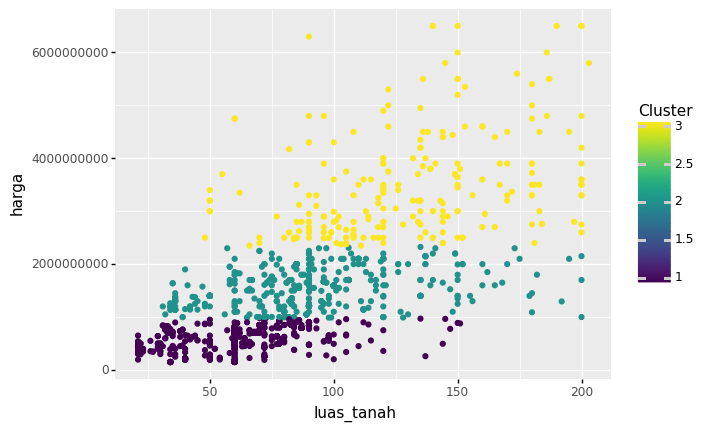

<ggplot: (126785547638)>

In [15]:
from plotnine import ggplot, aes, geom_point
(ggplot(df, aes(x = 'luas_tanah', y = 'harga', color = 'Cluster')) + geom_point())

In [16]:
cluster1['harga'].describe()

count    7.850000e+02
mean     5.674853e+08
std      2.134808e+08
min      1.500000e+08
25%      4.675365e+08
50%      5.500000e+08
75%      7.610000e+08
max      9.823000e+08
Name: harga, dtype: float64

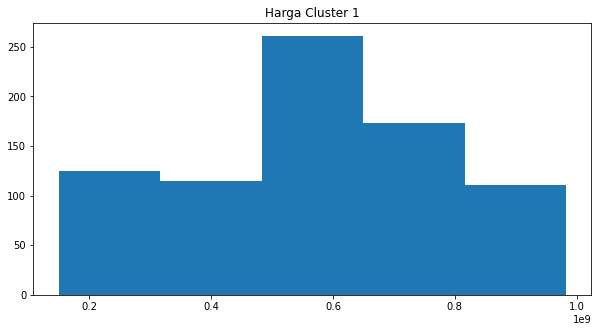

In [17]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['harga'], bins=5)
plt.title('Harga Cluster 1')
plt.savefig('Cluster_1/Histogram harga cluster 1.jpg', bbox_inches='tight')
plt.show()

In [18]:
cluster2['harga'].describe()

count    5.290000e+02
mean     1.529691e+09
std      3.469883e+08
min      9.900000e+08
25%      1.210000e+09
50%      1.500000e+09
75%      1.700003e+09
max      2.325000e+09
Name: harga, dtype: float64

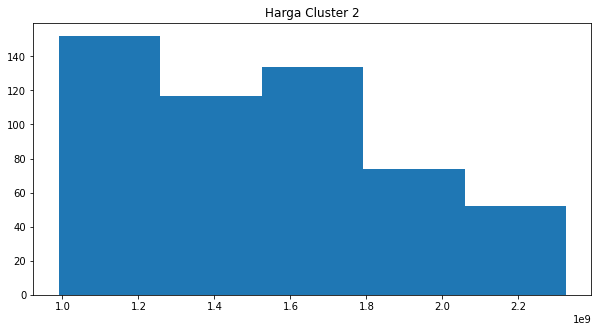

In [19]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['harga'], bins=5)
plt.title('Harga Cluster 2')
plt.savefig('Cluster_2/Histogram harga cluster 2.jpg', bbox_inches='tight')
plt.show()

In [20]:
cluster3['harga'].describe()

count    2.340000e+02
mean     3.533003e+09
std      1.031625e+09
min      2.350000e+09
25%      2.700000e+09
50%      3.300000e+09
75%      3.975000e+09
max      6.500000e+09
Name: harga, dtype: float64

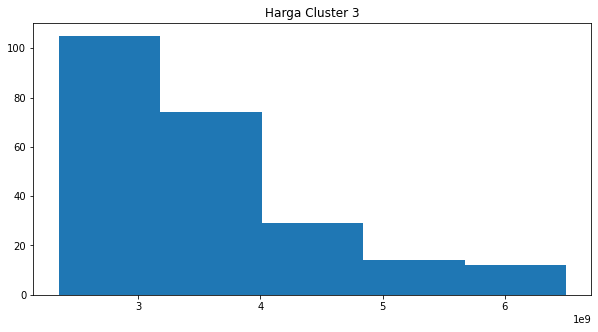

In [21]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['harga'], bins=5)
plt.title('Harga Cluster 3')
plt.savefig('Cluster_3/Histogram harga cluster 3.jpg', bbox_inches='tight')
plt.show()

<p>Jika dilihat dari atribut harga, ketiga cluster yang sudah dibuat dapat dideskripsikan sebagai berikut:<p>
    
<p>Cluster 1 merupakan cluster dengan harga paling rendah yaitu berada pada rentang Rp 150.000.000 - Rp 982.300.000. Namun jika dilihat dari persebaran datanya melalui histogram, rumah pada cluster 1 paling banyak berada pada rentang harga Rp 450.000.000 - Rp 650.000.000.<p>
    
<p>Cluster 2 merupakan cluster dengan harga menengah yaitu berada pada rentang Rp 990.000.000 - Rp 2.325.000.000. Namun jika dilihat dari persebaran datanya melalui histogram, rumah pada cluster 2 paling banyak berada pada rentang harga Rp 990.000.000 - Rp 1.800.000.000.<p>
    
<p>Cluster 3 merupakan cluster dengan harga paling tinggi yaitu berada pada rentang Rp 2.350.000.000 - Rp 6.500.000.000. Namun jika dilihat dari persebaran datanya melalui histogram, rumah pada cluster 3 paling banyak berada pada rentang harga Rp 2.350.000.000 - Rp 4.000.000.000.

<h1>Luas Tanah<h1>

In [22]:
cluster1['luas_tanah'].describe()

count    785.000000
mean      63.969427
std       20.389300
min       21.000000
25%       60.000000
50%       60.000000
75%       78.000000
max      151.000000
Name: luas_tanah, dtype: float64

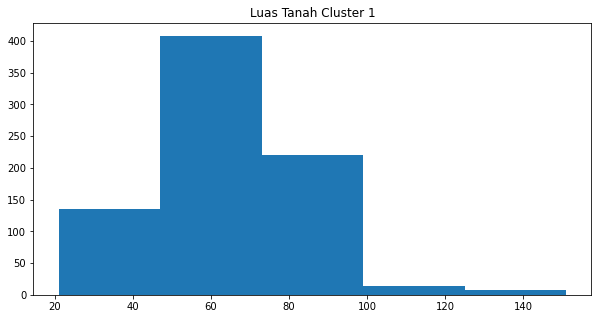

In [23]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['luas_tanah'], bins=5)
plt.title('Luas Tanah Cluster 1')
plt.savefig('Cluster_1/Histogram luas tanah cluster 1.jpg', bbox_inches='tight')
plt.show()

In [24]:
cluster2['luas_tanah'].describe()

count    529.000000
mean      90.506616
std       30.981918
min       31.000000
25%       73.000000
50%       90.000000
75%      105.000000
max      200.000000
Name: luas_tanah, dtype: float64

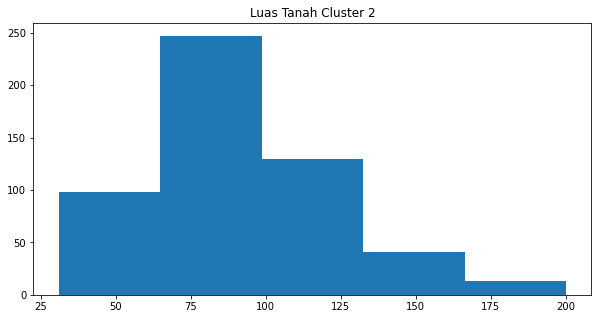

In [25]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['luas_tanah'], bins=5)
plt.title('Luas Tanah Cluster 2')
plt.savefig('Cluster_2/Histogram luas tanah cluster 2.jpg', bbox_inches='tight')
plt.show()

In [26]:
cluster3['luas_tanah'].describe()

count    234.000000
mean     130.235043
std       37.843141
min       48.000000
25%      100.250000
50%      132.000000
75%      150.750000
max      203.000000
Name: luas_tanah, dtype: float64

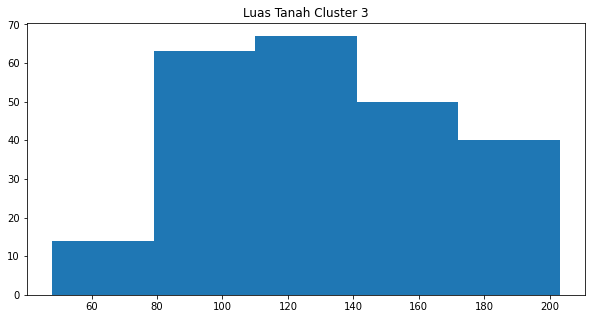

In [27]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['luas_tanah'], bins=5)
plt.title('Luas Tanah Cluster 3')
plt.savefig('Cluster_3/Histogram luas tanah cluster 3.jpg', bbox_inches='tight')
plt.show()

<p> Jika dilihat dari atribut luas tanah, ketiga cluster yang sudah dibuat dapat dideskripsikan sebagai berikut:<p>

<p>Cluster 1 merupakan cluster dengan luas tanah terkecil dengan rentang luas tanah 21 m<sup>2</sup> - 151 m<sup>2</sup>. Namun jika dilihat sebaran datanya melalui histogram, rumah pada cluster 1 paling banyak berada pada rentang luas tanah 45 m<sup>2</sup> - 75 m<sup>2</sup>.<p>
    
<p>Cluster 2 merupakan cluster dengan luas tanah menengah dengan rentang luas tanah 31 m<sup>2</sup> - 200 m<sup>2</sup>. Namun jika dilihat dari sebaran datanya melalui histogram, rumah pada cluster 2 paling banyak berada pada rentang luas tanah 60 m<sup>2</sup> - 100 m<sup>2</sup>.<p>
    
<p>Cluster 3 merupakan cluster dengan luas tanah tertinggi dengan rentang luas tanah 48 m<sup>2</sup> - 203 m<sup>2</sup>. Namun jika dilihat dari sebaran datanya melalui histogram, rumah pada cluster 3 paling banyak berada pada rentang luas tanah 80 m<sup>2</sup> - 140 m<sup>2</sup>.<p>

<h1>Luas Bangunan<h1>

In [28]:
cluster1['luas_bangunan'].describe()

count    785.000000
mean      53.262420
std       20.247195
min       21.000000
25%       38.000000
50%       50.000000
75%       64.000000
max      172.000000
Name: luas_bangunan, dtype: float64

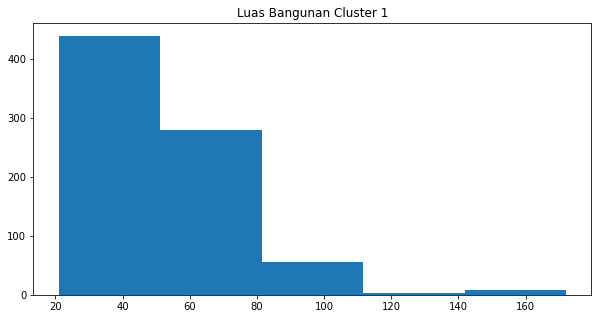

In [29]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['luas_bangunan'], bins=5)
plt.title('Luas Bangunan Cluster 1')
plt.savefig('Cluster_1/Histogram luas bangunan cluster 1.jpg', bbox_inches='tight')
plt.show()

In [30]:
cluster2['luas_bangunan'].describe()

count    529.000000
mean     109.128544
std       41.984558
min       31.000000
25%       79.000000
50%      100.000000
75%      136.000000
max      262.000000
Name: luas_bangunan, dtype: float64

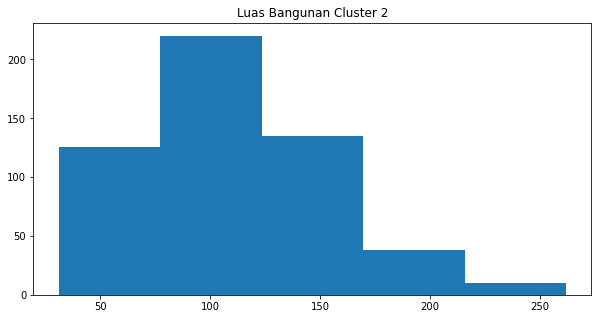

In [31]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['luas_bangunan'], bins=5)
plt.title('Luas Bangunan Cluster 2')
plt.savefig('Cluster_2/Histogram luas bangunan cluster 2.jpg', bbox_inches='tight')
plt.show()

In [32]:
cluster3['luas_bangunan'].describe()

count    234.000000
mean     172.717949
std       47.412869
min       72.000000
25%      140.000000
50%      166.500000
75%      200.000000
max      265.000000
Name: luas_bangunan, dtype: float64

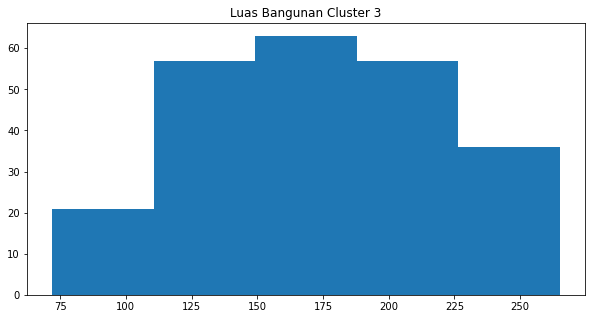

In [33]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['luas_bangunan'], bins=5)
plt.title('Luas Bangunan Cluster 3')
plt.savefig('Cluster_3/Histogram luas bangunan cluster 3.jpg', bbox_inches='tight')
plt.show()

<p> Jika dilihat dari atribut luas bangunan, ketiga cluster yang sudah dibuat dapat dideskripsikan sebagai berikut:<p>

<p>Cluster 1 merupakan cluster dengan luas bangunan terkecil dengan rentang luas bangunan 21 m<sup>2</sup> - 172 m<sup>2</sup>. Namun jika dilihat sebaran datanya melalui histogram, rumah pada cluster 1 paling banyak berada pada rentang luas tanah 21 m<sup>2</sup> - 50 m<sup>2</sup>.<p>
    
<p>Cluster 2 merupakan cluster dengan luas tanah menengah dengan rentang luas tanah 31 m<sup>2</sup> - 262 m<sup>2</sup>. Namun jika dilihat dari sebaran datanya melalui histogram, rumah pada cluster 2 paling banyak berada pada rentang luas tanah 75 m<sup>2</sup> - 125 m<sup>2</sup>.<p>
    
<p>Cluster 3 merupakan cluster dengan luas tanah tertinggi dengan rentang luas tanah 72 m<sup>2</sup> - 265 m<sup>2</sup>. Namun jika dilihat dari sebaran datanya melalui histogram, rumah pada cluster 3 paling banyak berada pada rentang luas tanah 110 m<sup>2</sup> - 225 m<sup>2</sup>.<p>

<h1>Kamar Tidur<h1>

In [34]:
cluster1['kamar_tidur'].describe()

count    785.000000
mean       2.384713
std        0.616334
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: kamar_tidur, dtype: float64

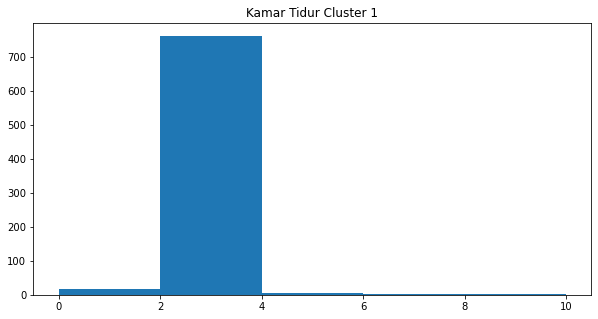

In [35]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['kamar_tidur'], bins=5, range=(0,10))
plt.title('Kamar Tidur Cluster 1')
plt.savefig('Cluster_1/Histogram kamar tidur cluster 1.jpg', bbox_inches='tight')
plt.show()

In [36]:
cluster2['kamar_tidur'].describe()

count    529.000000
mean       3.196597
std        0.804290
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max       10.000000
Name: kamar_tidur, dtype: float64

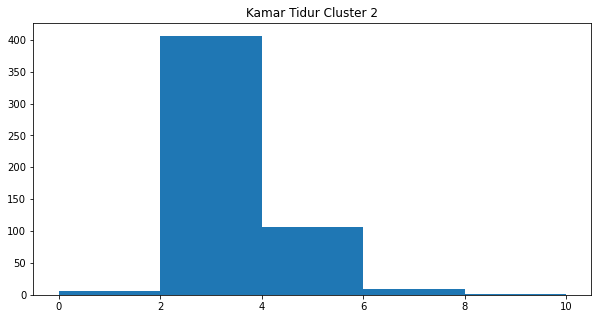

In [37]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['kamar_tidur'], bins=5, range=(0,10))
plt.title('Kamar Tidur Cluster 2')
plt.savefig('Cluster_2/Histogram kamar tidur cluster 2.jpg', bbox_inches='tight')
plt.show()

In [38]:
cluster3['kamar_tidur'].describe()

count    234.000000
mean       4.081197
std        1.199888
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: kamar_tidur, dtype: float64

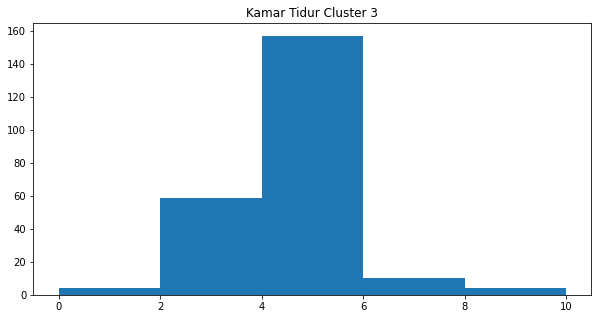

In [39]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['kamar_tidur'], bins=5, range=(0,10))
plt.title('Kamar Tidur Cluster 3')
plt.savefig('Cluster_3/Histogram kamar tidur cluster 3.jpg', bbox_inches='tight')
plt.show()

<p>Jika dilihat dari atribut kamar tidur, ketiga cluster yang telah dibuat dapat dideskripsikan sebagai berikut:<p>
 
<p>Mayoritas rumah pada cluster 1, yaitu sekitar 700 rumah, memiliki kamar tidur dengan rentang 2-4 kamar tidur. Sedangkan sangat sedikit rumah pada cluster 1 yang memiliki dibawah 2 kamar tidur dan diatas 4 kamar tidur.<p>
    
<p>Mayoritas rumah pada cluster 2, yaitu sekitar 400 rumah, memiliki kamar tidur dengan rentang 2-4 kamar tidur. Lalu sekitar 100 rumah memiliki kamar tidur dengan rentang 4-6 kamar tidur. Sedangkan sangat sedikit rumah pada cluster 2 yang memiliki dibawah 2 kamar tidur dan diatas 6 kamar tidur.<p>
    
<p>Mayoritas rumah pada pada cluster 3, yaitu sekitar 160 rumah, memiliki kamar tidur dengan rentang 4-6 kamar tidur. Sekitar 60 rumah memiliki kamar tidur dengan rentang 2-4 kamar tidur. Sedangkan sangat sedikit rumah pada cluster 3 yang memiliki dibawah 2 kamar tidur dan diatas 6 kamar tidur.<p>

<h1>Kamar Mandi<h1>

In [40]:
cluster1['kamar_mandi'].describe()

count    785.000000
mean       1.569427
std        0.641334
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: kamar_mandi, dtype: float64

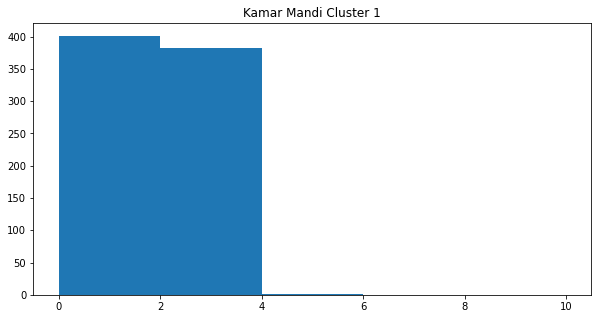

In [41]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['kamar_mandi'], bins=5, range=(0,10))
plt.title('Kamar Mandi Cluster 1')
plt.savefig('Cluster_1/Histogram kamar mandi cluster 1.jpg', bbox_inches='tight')
plt.show()

In [42]:
cluster2['kamar_mandi'].describe()

count    529.000000
mean       2.419660
std        0.716203
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: kamar_mandi, dtype: float64

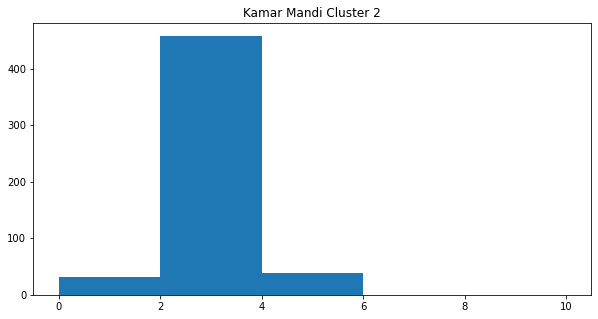

In [43]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['kamar_mandi'], bins=5, range=(0,10))
plt.title('Kamar Mandi Cluster 2')
plt.savefig('Cluster_2/Histogram kamar mandi cluster 2.jpg', bbox_inches='tight')
plt.show()

In [44]:
cluster3['kamar_mandi'].describe()

count    234.000000
mean       3.247863
std        1.091567
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: kamar_mandi, dtype: float64

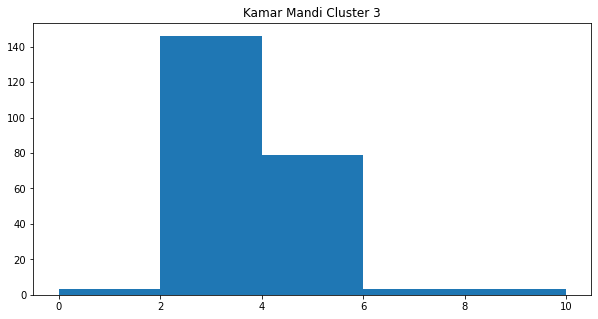

In [45]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['kamar_mandi'], bins=5, range=(0,10))
plt.title('Kamar Mandi Cluster 3')
plt.savefig('Cluster_3/Histogram kamar mandi cluster 3.jpg', bbox_inches='tight')
plt.show()

<p>Jika dilihat dari atribut kamar mandi, ketiga cluster yang telah dibuat dapat dideskripsikan sebagai berikut:<p>
    
<p>Mayoritas rumah pada cluster 1, yaitu sekitar 300-400 rumah memiliki kamar mandi dengan rentang 1-4 kamar mandi. Terdapat beberapa rumah pada cluster 1 yang memiliki kamar mandi dengan rentang 4-6 kamar mandi namun sangat sedikit. Sedangkan tidak ada rumah pada cluster 1 yang memiliki diatas 6 kamar mandi.<p>
    
<p>Mayoritas rumah pada cluster 3, yaitu lebih dari 400 rumah, memiliki kamar mandi dengan rentang 2-4 kamar mandi. Terdapat beberapa rumah pada cluster 2 yang memiliki 1-2 kamar mandi dan 4-6 kamar mandi, namun sangat sedikit. Sedangkan tidak ada rumah pada cluster 2 yang memiliki diatas 6 kamar mandi.<p>
    
<p>Mayoritas rumah pada cluster 3, yaitu sekitar 140 rumah, memiliki kamar mandi dengan rentang 2-4 kamar mandi. Lalu sekitar 80 rumah memiliki kamar mandi dengan rentang 4-6 kamar mandi. Namun sangat sedikit rumah pada cluster 3 yang memiliki dibawah 2 kamar mandi dan diatas 6 kamar mandi.

<h1>Lantai<h1>


In [46]:
cluster1['lantai'].describe()

count    785.000000
mean       1.535032
std        0.531275
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: lantai, dtype: float64

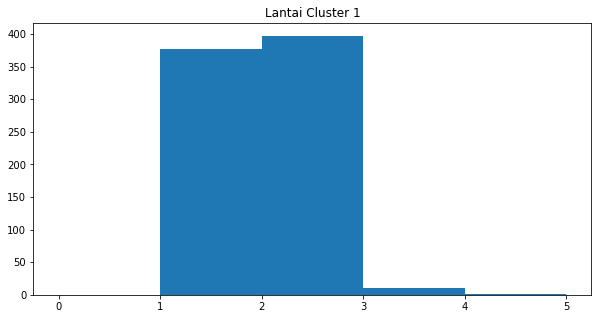

In [47]:
plt.figure(figsize=(10,5))
plt.hist(cluster1['lantai'], bins=5, range=(0,5))
plt.title('Lantai Cluster 1')
plt.savefig('Cluster_1/Histogram lantai cluster 1.jpg', bbox_inches='tight')
plt.show()

In [48]:
cluster2['lantai'].describe()

count    529.000000
mean       1.971645
std        0.515984
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: lantai, dtype: float64

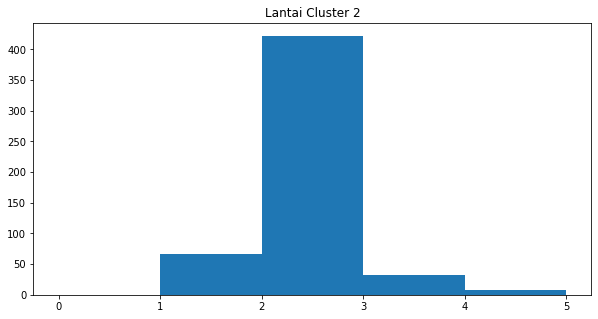

In [49]:
plt.figure(figsize=(10,5))
plt.hist(cluster2['lantai'], bins=5, range=(0,5))
plt.title('Lantai Cluster 2')
plt.savefig('Cluster_2/Histogram lantai cluster 2.jpg', bbox_inches='tight')
plt.show()

In [50]:
cluster3['lantai'].describe()

count    234.000000
mean       2.072650
std        0.680081
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: lantai, dtype: float64

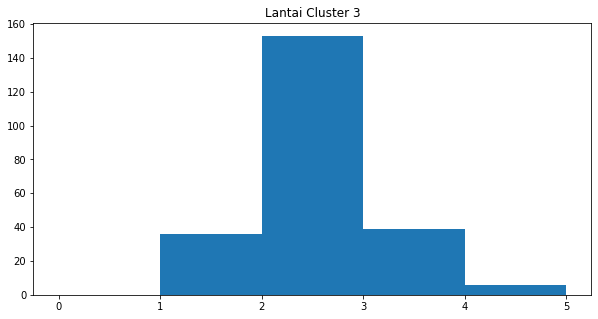

In [51]:
plt.figure(figsize=(10,5))
plt.hist(cluster3['lantai'], bins=5, range=(0,5))
plt.title('Lantai Cluster 3')
plt.savefig('Cluster_3/Histogram lantai cluster 3.jpg', bbox_inches='tight')
plt.show()

<p>Jika dilihat dari atribut lantai, ketiga cluster yang telah dibuat dapat dideskripsikan sebagai berikut:<p>
    
<p>Mayoritas rumah pada cluster 1 memiliki lantai dengan rentang 1-4 lantai. Sedangkan sangat sedikit rumah yang memiliki lantai diluar rentang 1-4 lantai.<p>
    
<p>Mayoritas rumah pada cluster 2 memiliki lantai dengan rentang 2-3 lantai. Beberapa rumah memiliki rentang 1-2 lantai dan 3-4 lantai. Sedangkan sangat sedikit rumah pada cluster 2 yang memiliki diatas 4 lantai.<p>
    
<p>Rumah pada cluster 3 memiliki ciri yang cukup serupa dengan cluster 3 jika dilihat dari sebaran atribut lantai.<p>

<h1>Lokasi<h1>

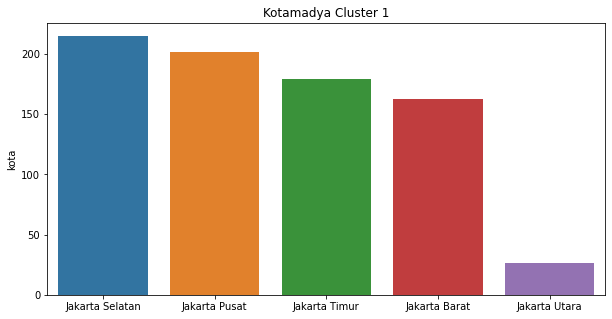

In [52]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster1['kota'].value_counts().index, y=cluster1.kota.value_counts())
plt.title('Kotamadya Cluster 1')
plt.savefig('Cluster_1/Sebaran Kotamadya cluster 1.jpg', bbox_inches='tight')

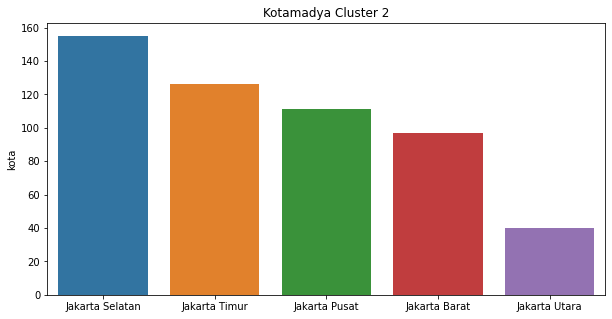

In [53]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster2['kota'].value_counts().index, y=cluster2.kota.value_counts())
plt.title('Kotamadya Cluster 2')
plt.savefig('Cluster_2/Sebaran Kotamadya cluster 2.jpg', bbox_inches='tight')

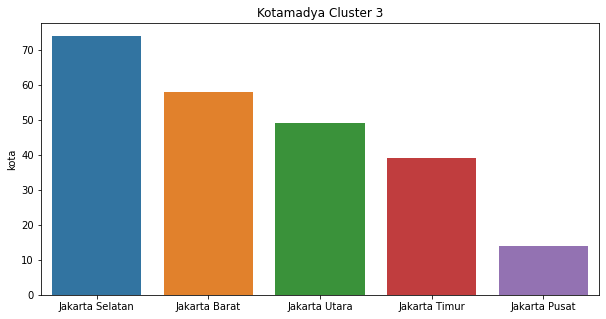

In [54]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster3['kota'].value_counts().index, y=cluster3.kota.value_counts())
plt.title('Kotamadya Cluster 3')
plt.savefig('Cluster_3/Sebaran Kotamadya cluster 3.jpg', bbox_inches='tight')

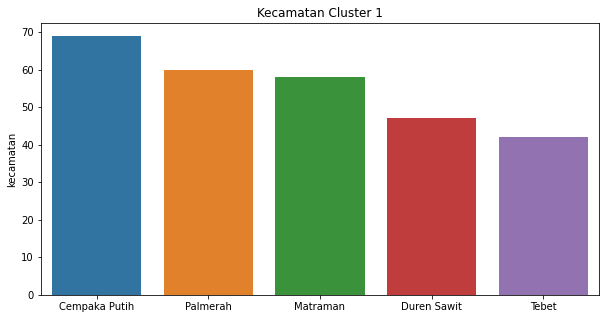

In [55]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster1['kecamatan'].value_counts()[:5].index, y=cluster1.kecamatan.value_counts()[:5])
plt.title('Kecamatan Cluster 1')
plt.savefig('Cluster_1/Sebaran Kecamatan cluster 1.jpg', bbox_inches='tight')

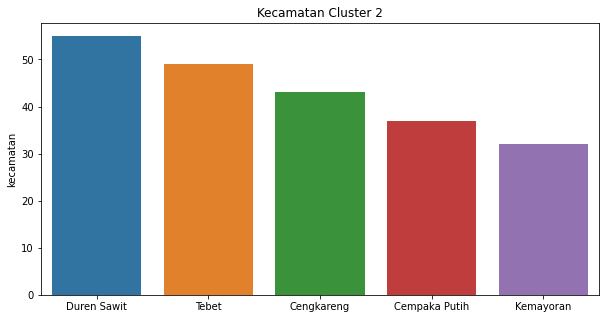

In [56]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster2['kecamatan'].value_counts()[:5].index, y=cluster2.kecamatan.value_counts()[:5])
plt.title('Kecamatan Cluster 2')
plt.savefig('Cluster_2/Sebaran Kecamatan cluster 2.jpg', bbox_inches='tight')

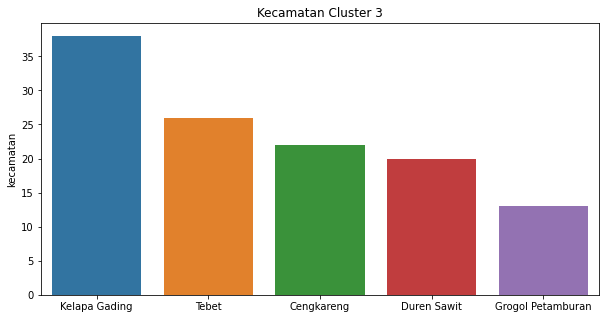

In [57]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cluster3['kecamatan'].value_counts()[:5].index, y=cluster3.kecamatan.value_counts()[:5])
plt.title('Kecamatan Cluster 3')
plt.savefig('Cluster_3/Sebaran Kecamatan cluster 3.jpg', bbox_inches='tight')